In [1]:
############
#This program takes about 60 minutes to run
############

#Loading Package
import os

import time
import numpy as np
import scipy as sci
import scipy.io as sio
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras


from numpy.random import seed
seed(100)


import matplotlib.pyplot as plt


import time



In [2]:
# load raw data
raw = pd.read_csv(os.path.join('Implied_Volatility_Data_vFinal.csv'))
# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
raw.head(n=5)

Size of the dataset (row, col):  (125700, 5)


,Date,SPX Return,Time to Maturity in Year,Delta,Implied Volatility Change
0,20140630,0.006678,0.184,0.745927,0.008462
1,20140630,0.006678,2.252,0.286911,0.002024
2,20140630,0.006678,0.124,0.902941,0.019707
3,20140630,0.006678,2.144,0.910926,0.006424
4,20140630,0.006678,1.412,0.885760,0.005673


## Construct the 3 variables for Regression Approach

In [3]:
# construct the 3 variables for regression
raw['x1'] = raw['SPX Return'] / np.sqrt(raw['Time to Maturity in Year'])
raw['x2'] = raw['SPX Return'] / np.sqrt(raw['Time to Maturity in Year']) * raw['Delta']
raw['x3'] = raw['x2'] * raw['Delta']

# Put the X and Y variable in data frame for regression
y = raw['Implied Volatility Change']
X = raw[['x1', 'x2', 'x3','SPX Return','Time to Maturity in Year','Delta']]

In [4]:
# Divide data into training set and test set(note that random seed is set)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=100)

## Feature Scaling

In [5]:
# Scale features based on Z-Score
scaler = StandardScaler()
scaler.fit(X_train)


X_scaled_train = scaler.transform(X_train)
X_scaled_vals = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

## Run Regression

In [6]:
# Run the regression on the training data
lr = LinearRegression(fit_intercept=False)
lr.fit(X_scaled_train[:,:3], y_train)

# Get the prediction
y_pred = lr.predict(X_scaled_test[:,:3])

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print('Test loss (MSE):', mse)

Test loss (MSE): 7.423167462421238e-05


## ML Approach

In [7]:
# Create ML Model
# Sequential function allows you to define your Neural Network in sequential order
# Within Sequential, use Dense function to define number of nodes, activation function and other related parameters 
# For more information regrading to activation functoin, please refer to https://keras.io/activations/
model = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (3,)),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                Dense(1)])

# Bonus Individual Task
- Changing hidden layers
- Changing nodes per layer

In [8]:
# 1a (i) Changing hidden layers to one
model_1a_i = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (3,)),
                                Dense(1)])

# Model summary function shows what you created in the model
# model_1a_i.summary()

In [9]:
# 1a (ii) Changing hidden layers to five
model_1a_ii = keras.models.Sequential([Dense(20,activation = "sigmoid",input_shape = (3,)),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),
                                 Dense(20,activation = "sigmoid"),Dense(20,activation = "sigmoid"),                                 
                                Dense(1)])

# Model summary function shows what you created in the model
# model_1a_ii.summary()

In [10]:
# 1b (i) Changing nodes per layer to 10
model_1b_i = keras.models.Sequential([Dense(10,activation = "sigmoid",input_shape = (3,)),
                                 Dense(10,activation = "sigmoid"),Dense(10,activation = "sigmoid"),
                                Dense(1)])

# Model summary function shows what you created in the model
# model_1b_i.summary()

In [11]:
# 1b (ii) Changing nodes per layer to 40
model_1b_ii = keras.models.Sequential([Dense(40,activation = "sigmoid",input_shape = (3,)),
                                 Dense(40,activation = "sigmoid"),Dense(40,activation = "sigmoid"),
                                Dense(1)])

# Model summary function shows what you created in the model
# model_1b_ii.summary()

In [12]:
# Using ReLu activation functoin
model_1c = keras.models.Sequential([Dense(20,activation = "relu",input_shape = (3,)),
                                 Dense(20,activation = "relu"),Dense(20,activation = "relu"),
                                Dense(1)])

In [13]:
# Complie function allows you to choose your measure of loss and optimzer
# For other optimizer, please refer to https://keras.io/optimizers/
models = [model, model_1a_i, model_1a_ii, model_1b_i, model_1b_ii, model_1c]

for i in models:
    i.compile(loss = "mse",optimizer = "Adam")

Test Loss(MSE) for Initial Model: 6.456860137404874e-05
Gain Ratio for Initial Model: 0.13017452858340617
Test Loss(MSE) for Reduced Hidden Layers: 6.966669025132433e-05
Gain Ratio for Reduced Hidden Layers: 0.06149644873293858
Test Loss(MSE) for Increased Hidden Layers: 6.412145012291148e-05
Gain Ratio for Increased Hidden Layers: 0.1361982543500806
Test Loss(MSE) for Reduced Nodes per layer: 6.436398689402267e-05
Gain Ratio for Reduced Nodes per layer: 0.13293095946095135
Test Loss(MSE) for Increased Nodes per layer: 6.470730295404792e-05
Gain Ratio for Increased Nodes per layer: 0.12830603267918017
Test Loss(MSE) for ReLu Activation: 6.347984162857756e-05
Gain Ratio for ReLu Activation: 0.14484157942097486


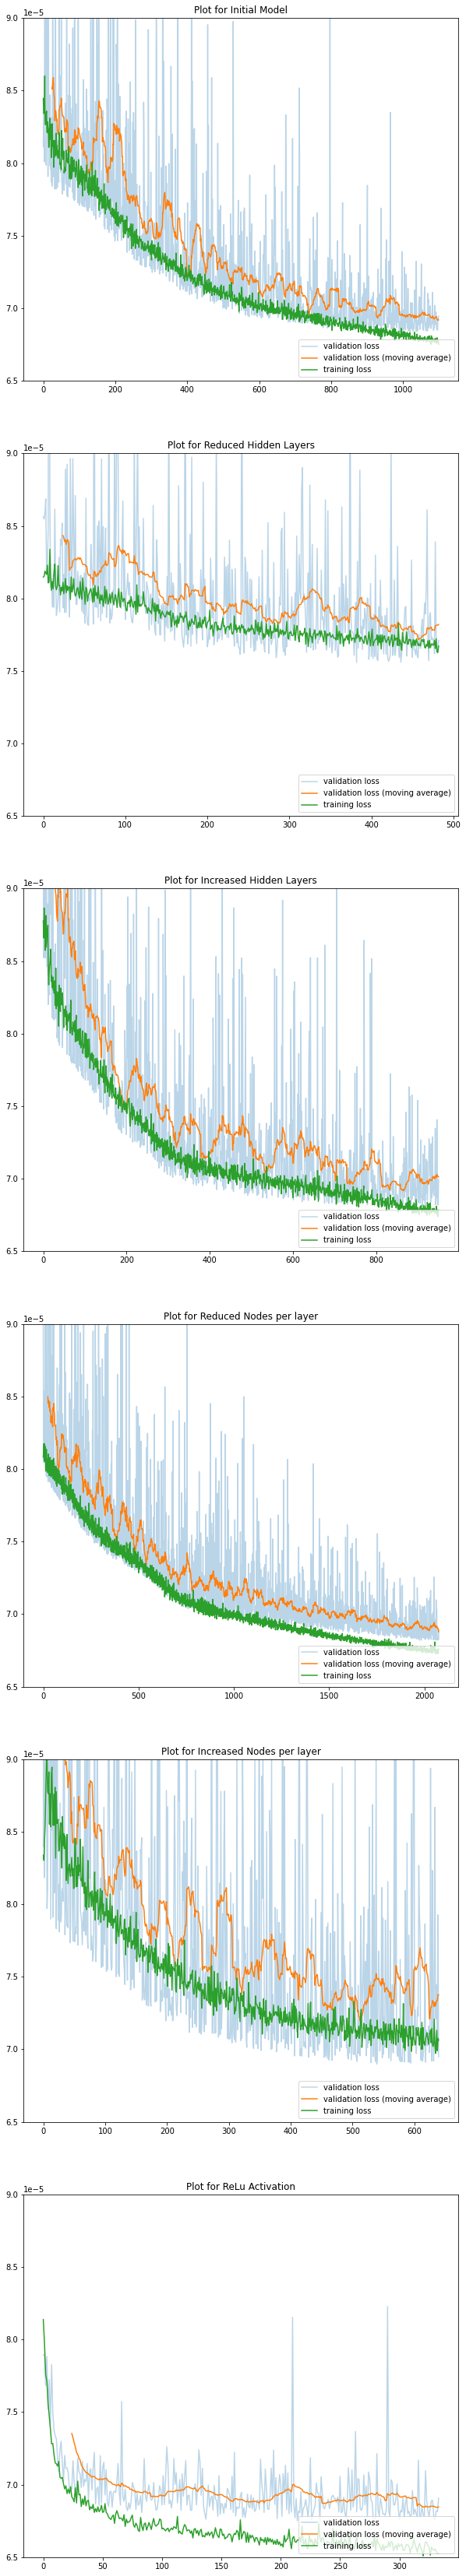

In [16]:
model_titles, dfs = ['m1.h5', 'm2.h5', 'm3.h5', 'm4.h5', 'm5.h5','m6.h5'], []
model_names = ['Initial Model', 'Reduced Hidden Layers', 'Increased Hidden Layers', 'Reduced Nodes per layer', 'Increased Nodes per layer', 'ReLu Activation']

for i in range(len(models)):
    checkpoint_cb = keras.callbacks.ModelCheckpoint(model_titles[i],save_best_only = True) 
    early_stopping_cb = keras.callbacks.EarlyStopping(patience = 100,restore_best_weights = True)
    history = models[i].fit(X_scaled_train[:,3:6],y_train,epochs=50000, batch_size = 128, verbose = 0, validation_data=(X_scaled_vals[:,3:6],y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])
    dfs.append(pd.DataFrame(history.history))

fig, (ax1,ax2,ax3,ax4,ax5,ax6)  = plt.subplots(6,1,figsize=(10, 60))

axes = (ax1,ax2,ax3,ax4,ax5,ax6) 

for i in range(len(dfs)):
    # Load the best model you saved and calcuate MSE for testing set
    model = keras.models.load_model(model_titles[i])
    mse_test = model.evaluate(X_scaled_test[:,3:6],y_test,verbose=0)
    gain = 1 - mse_test/mse 
    print('Test Loss(MSE) for ' + str(model_names[i]) + ': ' + str(mse_test))
    print('Gain Ratio for ' + str(model_names[i]) + ': ' + str(gain))

    axes[i].plot(np.arange(len(dfs[i])), dfs[i]['val_loss'], alpha = 0.3, label='validation loss')
    axes[i].plot(np.arange(len(dfs[i])), dfs[i]['val_loss'].rolling(25).mean(), label='validation loss (moving average)')
    axes[i].plot(np.arange(len(dfs[i])), dfs[i]['loss'], label='training loss')
    axes[i].legend(loc ='lower right')
    axes[i].set_ylim(0.000065,0.00009)
    axes[i].set_title('Plot for '+ str(model_names[i]))

plt.show()

# Findings

- Fewer Hidden Layers : Training loss curve is less steep and ends higher.
- More Hidden Layers : Training loss curve is steeper marginally and ends lower.
- Fewer Nodes per layer : Less fluctuation in the validation loss curve.
- More Nodes per layer : Higher fluctuation in the validation loss curve.
- Relu : Training and validation loss curves seem to have smaller fluctuations.